In [45]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [6]:
with open('Delhi_out.json', 'r') as f:
    data_str = f.read()
data_dict = json.loads(data_str)

In [82]:
from collections import defaultdict

# Initialize a defaultdict to collect data
time_aggregated_data = defaultdict(lambda: defaultdict(list))

# Loop through sites and their data
for site, records in data_dict.items():
    for record in records:
        time_key = f"{record['from date']} to {record['to date']}"
        
        for param, value in record.items():
            # Skip date fields
            if param not in ['from date', 'to date']:
                if value is not None:
                    # Convert string to float for arithmetic calculations
                    value = float(value) if value is not None else None
                    time_aggregated_data[time_key][param].append(value)

# Compute averages and prepare data for DataFrame
df_data = []
for time_key, params in time_aggregated_data.items():
    avg_data = {}
    from_date, to_date = time_key.split(' to ')
    avg_data['from_date'] = from_date
    avg_data['to_date'] = to_date
    
    for param, values in params.items():
        avg_data[param] = sum(values) / len(values) if values else None
    
    df_data.append(avg_data)

# Create DataFrame
df = pd.DataFrame(df_data)

In [83]:
# Calculate Cartesian coordinates for wind
df['Wind_X'] = df['WS'] * np.cos(np.radians(df['WD']))
df['Wind_Y'] = df['WS'] * np.sin(np.radians(df['WD']))

# Calculate a form of aggregation for wind (You can also use 'Wind_Y' or other aggregations)
df['Wind_Aggregated'] = np.sqrt(df['Wind_X']**2 + df['Wind_Y']**2)

In [89]:
actual_df = df
actual_df

,from_date,to_date,PM2.5,PM10,NO,NOx,NO2,NH3,SO2,CO,Ozone,WD,RH,WS,Temp,Wind_X,Wind_Y,Wind_Aggregated
0,01-Jan-2020 - 00:00,01-Jan-2020 - 01:00,611.481389,706.734444,180.859091,196.764545,69.152857,72.124074,20.738667,5.033529,14.305588,149.177586,90.507586,0.613929,6.700,-0.527217,0.314564,0.613929
1,01-Jan-2020 - 01:00,01-Jan-2020 - 02:00,553.346389,691.670000,151.988182,169.384848,61.324286,63.266071,20.391000,4.276765,11.227500,133.889655,90.980690,0.715357,6.664,-0.495937,0.515541,0.715357
2,01-Jan-2020 - 02:00,01-Jan-2020 - 03:00,495.638889,644.228125,148.740571,162.997714,56.196389,56.712143,17.796207,4.031765,10.363636,157.016897,91.020345,0.618214,6.376,-0.569140,0.241388,0.618214
3,01-Jan-2020 - 03:00,01-Jan-2020 - 04:00,448.779143,603.277188,152.781471,160.971765,53.608286,53.749286,16.312000,4.009394,16.487576,172.024138,91.660000,0.563929,5.904,-0.558473,0.078248,0.563929
4,01-Jan-2020 - 04:00,01-Jan-2020 - 05:00,435.362571,577.765625,157.725758,152.617813,52.303529,51.413571,15.845333,3.791875,16.822727,175.505517,92.116897,0.563571,5.584,-0.561838,0.044163,0.563571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32131,18-Jul-2023 - 01:00,18-Jul-2023 - 02:00,54.365714,110.500000,18.085714,23.627143,18.492857,59.733333,5.876667,1.131429,21.022857,119.750000,77.616000,0.758000,26.898,-0.376132,0.658095,0.758000
32132,18-Jul-2023 - 02:00,18-Jul-2023 - 03:00,43.647143,94.434286,20.098571,25.988571,17.941429,55.441667,5.645000,1.025714,20.227143,125.886000,79.476000,0.564000,26.534,-0.330602,0.456944,0.564000
32133,18-Jul-2023 - 03:00,18-Jul-2023 - 04:00,44.094286,87.140000,19.422857,24.505714,17.671429,55.543333,5.751667,0.981429,19.845714,123.892000,79.628000,0.606000,26.436,-0.337923,0.503035,0.606000
32134,18-Jul-2023 - 04:00,18-Jul-2023 - 05:00,45.401429,84.574286,21.558571,25.180000,15.294286,56.285000,6.026667,1.021429,20.454286,122.902000,75.970000,0.652000,25.834,-0.354169,0.547420,0.652000


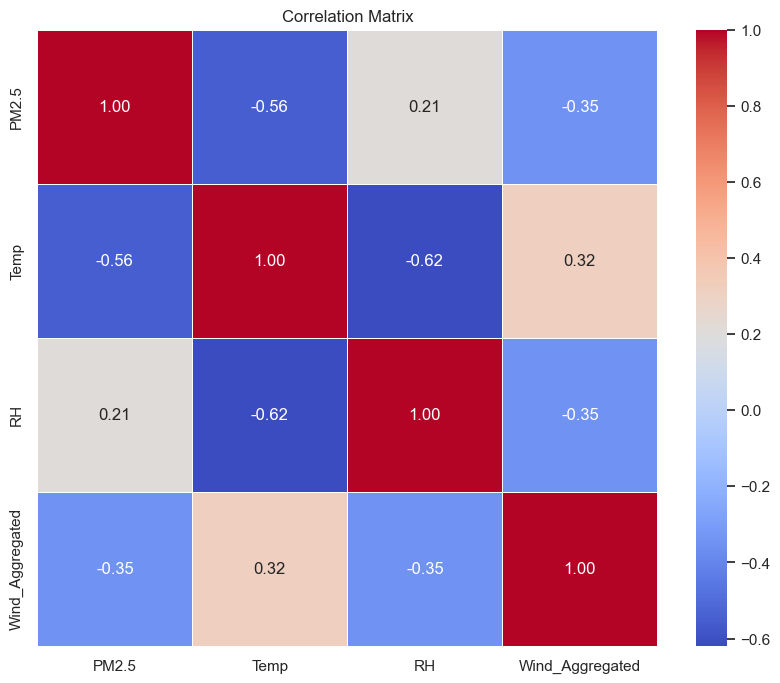

In [79]:
### Correlation matrix on raw data
# Convert possible string columns to numeric
cols_to_convert = ['PM2.5', 'Temp', 'RH', 'WD', 'WS']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Select relevant columns
selected_columns = ['PM2.5', 'Temp', 'RH', 'Wind_Aggregated']

# Calculate correlation matrix
correlation_matrix = df[selected_columns].corr()

# Plot correlation matrix
sns.set(style="white")
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)

plt.title("Correlation Matrix")
plt.show()

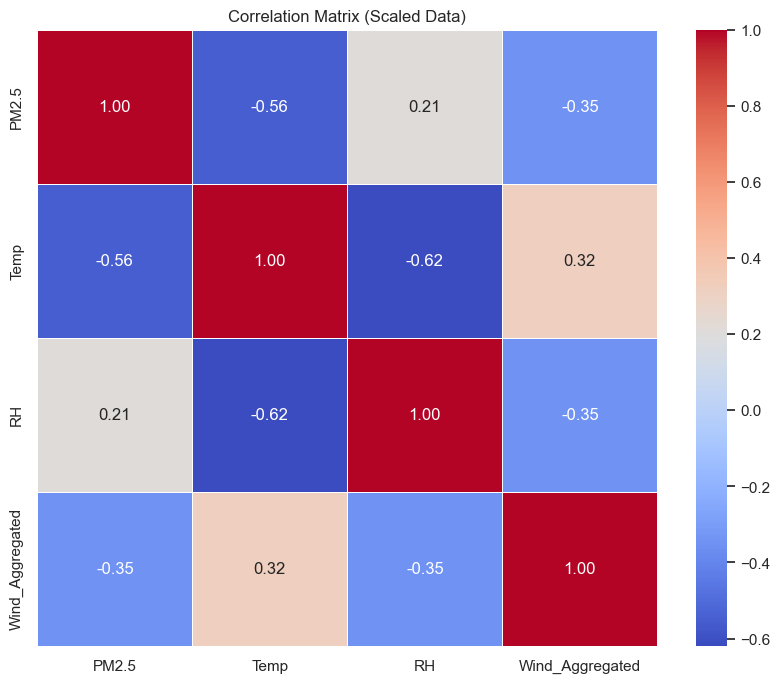

In [80]:
### Correlation matrix on normalized data
# Normalize the DataFrame using Min-Max scaling
# Identify the numerical columns
df['Wind_Aggregated'] = np.sqrt(df['Wind_X']**2 + df['Wind_Y']**2)

# Identify the numerical columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Scale only the numerical columns
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

# Select only the columns we are interested in
selected_columns = ['PM2.5', 'Temp', 'RH', 'Wind_Aggregated']
df_selected = df[selected_columns]

# Calculate the correlation matrix for the selected columns in the scaled DataFrame
correlation_matrix_selected = df_selected.corr()

# Plot the correlation matrix
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_scaled,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            linewidths=.5)
plt.title("Correlation Matrix (Scaled Data)")
plt.show()


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = actual_df[['Temp', 'RH', 'Wind_Aggregated']]
y = actual_df['PM2.5']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

mean_squared_error(y_test, y_pred)

4043.860308749835

In [88]:
# Ac acceptable error range for PM 2.5
acceptable_error = 60
# Calculate "accuracy"
correct_predictions = np.abs(y_pred - y_test) <= acceptable_error
accuracy_percentage = (np.sum(correct_predictions) / len(y_test)) * 100
accuracy_percentage

75.90230242688239